# Lecture 9: Optimization I


## Topics

* I. Introduction

    * Formulation
    * Types of Optimization Problems
    * Basic Concepts
    * Optimization Examples in Finance
    
* II. Unconstrained Optimization

    * Optimality Characterization
    * Solution Methods
        * Direct search method
        * Descent Methods
        
* III. Constrained Optimization
    * General framework
    * Duality
    * Optimality conditions
        * Why KKT conditions
    * Solution Methods
    
The current go to source for optimization is [*Convex Optimization*](https://web.stanford.edu/~boyd/cvxbook/) by Stephen Boyd and Lieven Vandenberghe. [`scipy`](https://docs.scipy.org/doc/scipy/reference/optimize.html) can be used for most problems you will encounter (at least in class), but there are many other optimization packages available (*e.g.* [`cvxop`](https://cvxopt.org/), [`cvxpy`](https://github.com/cvxgrp/cvxpy) and  [`mystic`](https://github.com/uqfoundation/mystic)).
 
 



# Introduction

Optimization exists in every field and most activities in finance revolve around some goals that needed to be optimized, *e.g.* maximizing profits, minimizing risk, maximizing utility, minimizing costs, and estimating parameters etc.

The theory of optimization has developed over time: 

In general, optimization problems are very difficult to solve and solution methods almost always involve some compromise (*e.g.* very long computation times or simplification of the problem).

There are certain exceptions -- problems that can be solved efficiently and reliably:
* least-squares problems
* linear programming problems
* convex optimization problems



### Least-Squares

$$\min \| A \mathbf x - \mathbf{b} \|_2^2$$

These problems are easy to recognize and, as you know, have an analytical solution

$$ \mathbf x^* = (A^T A)^{-1} A^T \mathbf{b}$$

Numerically, there are reliable and efficient algorithms and widely available software. 

Computation time is proportional to $n^2 k$ when $A \in \mathbb{R}^{k \times n}$.

There are standard techniques which increase flexibility (*e.g.* adding weights or regularization terms -- remember ridge regression?).

### Linear Programming

$$ \min \mathbf{c}^T \mathbf x $$
$$ \text{s.t. } a_i^T \mathbf x \le \mathbf{b}_i, \;\, i = 1, \dots , m$$

Not as easy to recognize as least-squares problems.

There is no analytical solution, but there are reliable and efficient algorithms.

Computation time is proportional to $n^2 m$ if $m \ge n$ (less if the problem has a certain structure).

There are standard tricks to convert problems involving $L_1$ and $L_{\infty}$ norms or piecewise-linear functions into linear programs.


### Convex Optimization

$$ \min f_0 (\mathbf x)$$
$$\text{s.t. } f_i(\mathbf x) \le b_i, \,\, i=1, \dots , m$$

Many problems can be solved through convex optimization, but they are often difficult to recognize.

There is no analytical solution, but there are reliable and efficient algorithms.

Computation time is roughly proportional to $\max \{n^3,n^2 m, F\}$, where $F$ is the cost of evaluating $f_i$'s and their first and second derivatives.

Convex optimization problems include least-squares and linear problems as special cases.


## Formulation

An optimization problem usually involves three elements:
* **Objective function**: the function to be optimized, that is, minimized or maximized: profit, loss, risk, etc.


* **Decision Variables**: variables that are used to find the solution: number of shares in each stock, amount of capital to be invested in each sector, etc.


* **Constraints**: choices that are restricted: total risk cannot exceed certain criteria, total amount of capital is limited, etc.


Problems that lack constraints are called *unconstrained optimization* problems, while other are called *constrained optimization* problems. Problems with no objective function are called *feasibility* problems.

Some problems may have multiple objective functions -- they are usually addressed by reducing them to a single objective function optimization or a sequence of optimization problems.

If the decision variables are restricted to integers or a set of discrete possibilities, the optimization is referred to a as an *integer* or *discrete optimization*. If there is no restriction on the variables, it is a *continuous optimization* problem.




### Mathematically

$$
\min_{\mathbf x\in \Psi, \; \Psi\subset \mathbb{R}^n} f(\mathbf x)
$$

where $ f(\mathbf x): \mathbb{R}^n \to \mathbb{R} $ is a scalar **objective function**, $\Psi$ is a subset of $\mathbb{R}^n$ and called the **feasible region**.





#### Definitions

* Minimization and maximization problems are equivalent

$$
\min_{\mathbf x\in \Psi} f(\mathbf x) = \max_{\mathbf x\in \Psi} (-f(\mathbf x))
$$






* If $\Psi = \mathbb{R}^n$, the problem is **unconstrained**, otherwise, it is **constrained**.







* If $f(\mathbf x)$ is linear and $\Psi$ is a polyhedron, then it is a **Linear Programming** problem, otherwise, **Nonlinear Programming**. (Polyhedron is defined as intersection of finite number of halfspaces and hyperplanes).



* If $f(\mathbf x)$ is quadratic and $\Psi$ is a polyhedron, then it is a **Quadratic Programming** problem.




* If $f(\mathbf x)$ and $\Psi$ are convex, then it is a **Convex Optimization** problem (of which linear and quadratic programming are special cases).











* If $\Psi$ contains only discrete variables, then it is a **Discrete Optimization** problem.









* If only integer variables are allowed, then it is an **Integer Programming** problem, (**Mixed Integer Programming** problems involve those in which only some of the variables are constrained to be integers).







* If the specifications of $f(\mathbf x)$ and $\Psi$ are NOT deterministic, then it is a  **Stochastic Programming** problem.







* Another name you often hear is **Dynamic Programming**, this does not refer to a particular type of optimization problem, rather it is a method for solving an optimization problem by breaking it down to a collection of simpler subproblems, using Bellman's Principle of Optimality.





<center><img src = "optimization tree.svg" height=500 width=1050></center>

Figure by [Cliburn Chan](https://genome.duke.edu/directory/cbb-faculty/cliburn-chan-phd).

### Basic Concepts

* A point $\mathbf x^*$ is called a **local minimum**, if $\exists \, \epsilon > 0$ 
$$
f(\mathbf x^*) \leq f(\mathbf x), \forall \mathbf x\in\Psi, \text{s.t. } \|  \mathbf x  - \mathbf x^* \| \lt \epsilon.
$$

* A point $\mathbf x^*$ is a **global minimum**, if  
$$
f(\mathbf x^*) \leq f(\mathbf x), \forall \mathbf x\in\Psi.
$$

* Finding the global minimum is considerably harder than a local minimum --- imaging the difference in the difficulties of getting to the top of your neighborhood hill vs getting to the top of Mt. Everest.

* With one exception: **Convexity guarantees that if an optimizer converges,it converges to the global minimum**.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [4]:
# Create a function
objective = np.poly1d([1.3, 4.0, 0.6]) # 1.3x^2+4x+0.6
print(objective)

     2
1.3 x + 4 x + 0.6


In [3]:
# Optimize
x_ = opt.fmin(objective, [3])
print("solved: x = {}".format(x_))

Optimization terminated successfully.
         Current function value: -2.476923
         Iterations: 20
         Function evaluations: 40
solved: x = [-1.53845215]


Minimizes a function using the downhill simplex algorithm. This algorithm only uses function values, not derivatives or second derivatives.

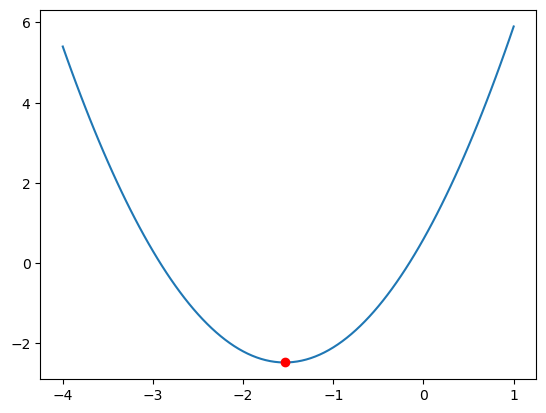

In [4]:
# Plot
x = np.linspace(-4,1,101)
plt.plot(x, objective(x))
plt.plot(x_, objective(x_), 'ro');

<p>&nbsp;</p>  

In [5]:
# Create a function
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

In [6]:
soln = opt.minimize_scalar(f, method='bounded', bounds=[0, 6])
print(soln)

     fun: -54.21003937712762
 message: 'Solution found.'
    nfev: 12
     nit: 12
  status: 0
 success: True
       x: 2.668865104039653


[key](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)

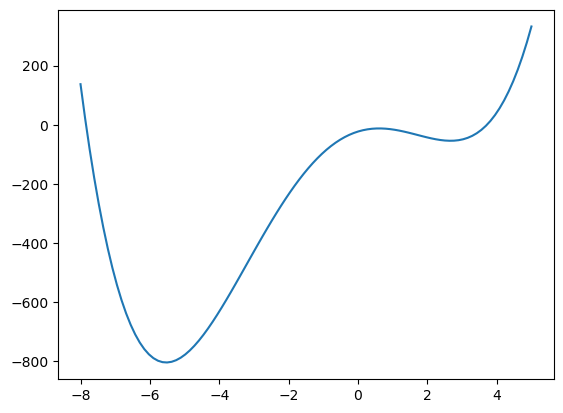

In [7]:
# Plot function
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x));


In [8]:
opt.minimize_scalar(f, method='Brent')

     fun: -803.3955308825884
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663

In [9]:
soln2 = opt.minimize_scalar(f, method='bounded', bounds=[-8, 6])
print(soln2)

     fun: -803.3955308825871
 message: 'Solution found.'
    nfev: 12
     nit: 12
  status: 0
 success: True
       x: -5.528801009131873


<p>&nbsp;</p>  

There are three available solvers that can be selected by the ‘method’ parameter. The default method is Brent.

1. Brent uses Brent’s algorithm to find a local minimum. The algorithm uses inverse parabolic interpolation when possible to speed up convergence of the golden section method.

2. Golden uses the golden section search technique. It uses analog of the bisection method to decrease the bracketed interval. It is usually preferable to use the Brent method.

3. Bounded can perform bounded minimization. It uses the Brent method to find a local minimum in the interval $x_1 < x_{opt} < x_2$.

<p>&nbsp;</p>   





If $f(\mathbf x)$ is differentiable (*i.e.* first derivatives exist), then a **necessary condition** for a local minimizer is that $\mathbf x^*$ is a **critical point**

$$
g (\mathbf x^*) = {\mathbf\nabla} _\mathbf x f(\mathbf x^*)  = 0
$$

* Clearly, finding the critical points is equivalent to root searching problems you encountered earlier.

* Observe that solving $f(\mathbf x) = \mathbf{0}$ is equivalent to

$$
\min_{\mathbf x}\left[ f(\mathbf x)^T f(\mathbf x)\right],
$$

(although this is normally ill-advised --- doing anything through a square or higher power when you can avoid it is a bad idea --- it makes the problem harder to solve, think ill-conditioned as a starter).

* But this shows the root searching problem and the optimization problem are closely related.


* A critical point is only a **necessary** condition for an optimum, it is not a **sufficient** condition,

<center><img src = "saddle_point_func.png" height=450 width=450></center>


* If $f(\mathbf x)$ is twice-differentiable (*i.e.* second derivatives exist), then a **sufficient condition** for a local minimizer is that, in addition to being a critical point, the **Hessian** at $\mathbf x^*$ is positive definite

$$
 H\, (\mathbf x^*) = {\mathbf\nabla^2} _\mathbf x f(\mathbf x^*)  \gt \mathbf{0}
$$







* These are all  natural conclusions from what you are already very familiar with (hopefully!): properties of a quadratic function and the Taylor series for a general (twice-differentiable) function

$$
f(\mathbf x^* + \mathbf\delta x) = f(\mathbf x^*) + {\mathbf\nabla} f(\mathbf x^*)^T {\mathbf\delta x} + \frac{1}{2} {\mathbf\delta x}^T{\mathbf\nabla^2} f(\mathbf x^*)  {\mathbf\delta x} + {O}\,(||{\mathbf\delta x}||^3)
$$




## Optimization Examples in Finance

### Portfolio Optimization

$$
\min_{\mathbf x}  \frac{1}{2} \lambda\; \mathbf x^T V \mathbf x - \mu^T \mathbf x \\
\text{s.t. } \;\mathbf{e}^T \mathbf x = 1
$$

where $\lambda$ is the risk-aversion coefficient, $\mu$ is the expected asset return vector and $V$ is the covariance matrix. This is a quadratic programming problem which combines expected return and weighted risk in the objective function.



Note that this problem can be constructed in several ways:

$$
\min_{\mathbf x}  \mathbf x^T V \mathbf x - \mu^T \mathbf x \\
\text{s.t. } \;\mathbf{\mu}^T \mathbf x \ge R \\
\mathbf{e}^T \mathbf x = 1 \\
\mathbf x \ge \mathbf{0}
$$
the classic Markowitz mean-variance problem with no short sales or:

$$
\min_{\mathbf x} \:  - \mu^T \mathbf x \\
\text{s.t. } \;\mathbf x^T V \mathbf x \le \sigma^2 \\
\mathbf{e}^T \mathbf x = 1 \\
\mathbf x \ge \mathbf{0}
$$
the dual to the classic Markowitz mean-variance problem with no short sales.

Or in a generalized multi-objective non-linear program:
$$
\min_{\mathbf x}  \alpha V(\mathbf x) - (1-\alpha) \mu( \mathbf x) \\
\text{s.t. } \;\mathbf{e}^T \mathbf x = 1 \\
\mathbf x \in X
$$
where $\alpha$ and $(1-\alpha)$ are the weights given to the risk and return and  $X$ is in the set of feasible solutions.

The optimization could be constructed with excess returns, $[\mathbf x - r_f \mathbf{e}]$ (the formulations above have the riskless asset in the $\mathbf x$ vector, usually as $\mathbf x_0$). 

The optimization could be constructed with a cash budget constraint where  $\sum_i \mathbf w_i = \text{W}$ where $\text{W}$ is the amount of capital to be invested and $\mathbf x_i$ is the cash amount invested in asset $i$. 

You will encounter all of these formulations (and more) -- the actual construct used often depends on what you are trying to achieve or demonstrate.

Obviously, constraints like short sales, diversification objectives, minimum and maximum position sizes, sector allocations, etc. can be included in the problem.

Along with tax lot considerations, transaction costs, factor models, portfolio revisions, and liabilities.

<p>&nbsp;</p>  

<p>&nbsp;</p>  

<center><img src = "portfolio optimization decision.png" height=850 width=850></center>

From [Newfound Research](https://blog.thinknewfound.com).


### (Static) Asset-Liability Management

$$
\min_{\mathbf x} \sum_j x_j P_j
$$
$$
\text{s.t. } \sum_j x_j C_j(t) \geq L(t) \;\;  \forall t
$$
$$
x_j \geq 0 \;\; \forall j
$$

where $x_j, P_j, C_j(t)$ are the amount, price and cashflow at time $t$ of asset $j$. $L(t)$ is the liability payment at time $t$. This is a linear programming problem.



### Volatility Surface fitting

$$
\min_{\sigma(S,t)} \sum_j^n (C(\sigma(S,t),K_j,T_j) - C_j)^2 
$$

where $\sigma(S,t) > 0$ is the volatility value at the surface point $(S,t)$, $C(\sigma(S,t),K_j,T_j)$ is the standard Black-Scholes formula for European call options, $C_j$ is the market quoted price of the option. This a non-linear optimization problem.



### Bond Portfolio Immunization

$$
\max_{\mathbf x} \sum_i^n D_i^{\text{FW}} P_i y_i x_i
$$
$$
\text{s.t. } \sum_i^n P_ix_i = P_L
$$
$$
\sum_i^n D_i^{\text{FW}}P_ix_i = D_L^{\text{FW}}P_L
$$
$$
\mathbf x \ge 0
$$

where $P_i$ is the price of a bond, $y_i$ is the yield, $x_i$ is the weight of bond $i$ in the portfolio, $P_L$ is the present value of the liabilities. And $D^{\text{FW}}$ is the Fisher-Weil duration given by:
$$
D_i^{\text{FW}} = -\frac{1}{P_i} \frac{d P_i}{d r}
$$

note that this is for a small parallel shift in the term structure.

We could add a second-order condition to this where
$$
\sum_i^n C_i P_i x_i \ge C_L P_L
$$
where $C_i$ is the convexity
$$
C_i = -\frac{1}{P_i} \frac{d^2 P_i}{d r^2}
$$

### Approximating Correlation Matrices

$$
\min \; \big [\sum_{i,j}(\Sigma_{i,j} - \Sigma_{i,j} )^2 \big ]^{\frac{1}{2}}
$$
$$
\text{s.t. } \; l_{i,j} \le \Sigma_{i,j} \le u_{i,j} \;\;  \forall (i,j) \in E
$$
$$
\Sigma \in C_s^n
$$

where $l$ and $u$ are lower and upper bounds on entries; $l_{i,i} =-1, u_{i,i} = 1, \; \forall i$, and $C_s^n$ is the cone of $n \times n$ symmetric and positive semidefinite matrices.


### Estimating Distribution Parameters

With a random sample $X_1, X_2, \cdots , X_n$ and an **assumed** probability distribution $f(x_i,\theta)$ which depends on an unknown parameter $\theta$. We want to find an point estimate for $\theta$ (note that $\theta$ could be a vector of parameters). A good estimate of the unknown parameter is the value of $\theta$ that **maximizes** the **likelihood** of observing the data. This can be written:

$$
\begin{split}
L(\theta) &= \text{Pr} (X_1=x_1,X_2=x_2,\cdots,X_n=x_n)\\
&= f(x_1,\theta) \cdot f(x_2,\theta)\cdots f(x_n,\theta)\\
& = \prod_{i=1}^n f(x_i,\theta)
\end{split}
$$

The first equality is the definition of the joint probability mass function. The second comes from the fact that we have a random sample, which implies that the data are iid. And the last is just shorthand. While one could try to maximize the function $L(\theta)$, taking the derivative of these functions is often complicated. Instead, we can use the fact that the natural logarithm is an increasing function of $x$ an maximize the **log-likelihood function**. Or, in practice, we minimize the negative of the log-likelihood function.

In many cases, we can simply take the derivative and set it equal to zero, but for complicated probability distributions, we rely on numerical optimization.

<p>&nbsp;</p>  

# Unconstrained Optimization

* Unconstrained means:

$$
\min_{\mathbf x\in  \mathbb{R}^n} f(\mathbf x)
$$



* We will focus on smooth functions (typically at least twice differentiable). 

The main purpose here is to show the various types of algorithms for solving the unconstrained optimization problems.





## Optimality Characterization

* The **necessary condition**: the solution must be a **critical point**:

$$
{g} (\mathbf x^*) = {\mathbf\nabla} _\mathbf x f(\mathbf x^*)  = 0
$$





* The **sufficient condition**: the **Hessian** at the optimal point must be positive definite,

$$
{H} (\mathbf x^*) = {\mathbf\nabla _\mathbf x}^2  f(\mathbf x^*)  \gt \mathbf 0
$$




## Solution Methods

* In practice, optimization problems are often solved using an **iterative algorithm**, which searches for a sequence of points,

$$
\mathbf x^0, \mathbf x^1, \mathbf x^2, \cdots, \mathbf x^n, \cdots
$$
with 
$$
f(\mathbf x^{k+1}) < f(\mathbf x^k).
$$

* The algorithm typically stops at $||{\mathbf\nabla} f(\mathbf x) || < \epsilon $ for some small $\epsilon$.


* Step size and search direction are critical choices that change the behavior of the search.
* No guarantee for finding the global minimum.




### Direct Search Method

* Similar in spirit to the Bisection method but in more than one dimension. Requires only function evaluations.
* Often applied to nonlinear optimization problems for which derivatives may not be known.

* Representative: [Nelder-Mead Method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method) (or Simplex Search method)
    * Searches through the simplex vertices (polytope of N+1 vertices in N dimensions)
    * Techniques: reflection - expansion - contraction - reduction

In [10]:
from IPython.display import Image
Image(url='Nelder-Mead_Himmelblau.gif')

* Advantages: simple, only function evaluation needed.

* Deficiencies: slow, may fail to converge in higher dimensions

* Suffers from the "curse of dimensionality"



### Descent Methods

**Algorithm for general descent method**
1. Given a starting point $ \mathbf x_0$, generate a series of points $x_{k+1} = x_k + \alpha_k p_k$.
2. Repeating until the stopping criterion is satisfied.

Critical choices:
1. Determine a descent direction $p_k$ at each $k$;
2. Line search. Choose a step size $\alpha_k > 0$;


Given the choice of direction, $p_k$, we would ideally minimize:

$$ \phi (\alpha) = f (x_k + \alpha p_k)$$

with respect to $\alpha$. This is usually computationally intensive. So generally, a sequence of $\alpha$ candidates are generated and the "best" is chosen according to some "condition".


<center><img src = "topographic-map-contour_v2.jpg" height=800 width=1050></center>


* Different ways of choosing the descent direction giving rise to different descent method and convergence rates.

* The line search method falls into two categories: exact line search and backtracking line search. 




#### Steepest Descent Method

In steepest descent, we choose $p_k = -\mathbf{ \nabla f(x_k)}$, because the gradient points in the direction of steepest ascent.


* If the objective function is differentiable, we have

$$
f(\mathbf x_k + \mathbf{\alpha_k} \mathbf{p_k}) \approx f(\mathbf x_k) + \alpha [ {\mathbf\nabla} f(\mathbf x_k)^T \mathbf{p_k} ]                        
$$

* This means choosing **gradient** direction

$$
\mathbf{p_k} = - {\mathbf\nabla} f(\mathbf x_k)
$$

will lead to the **steepest** descent at points sufficiently close to $\mathbf x_k$.




* The line search step size can be done in one-dimensional minimization:

$$
\alpha_k = \min_{\alpha} f(\mathbf x_k + \alpha_k \mathbf{p}_k) \triangleq \min_{\alpha} \phi(\alpha).
$$


* Exact line search (choosing the minimizing $\alpha_k$ above) leads to zig-zag path towards the minimum: which means slow convergence

$$
\phi'(\mathbf{\alpha_k}) = 0 =  [{\mathbf\nabla} f(\mathbf x_k + \mathbf{\alpha_k p_k})]^T \mathbf{p_k} ,
$$

(notice the two consecutive search directions will be perpendicular to each other).

If we use this method of steepest descent, consecutive search directions are always perpendicular. This is clearly inefficient since we are only using the current steepest descent direction and throwing away all previous knowledge which could potentially be used to build a more accurate picture of the functional we are trying to minimize. In fact, the steepest descents method is only efficient when the minimum is **spherical** (*i.e.* when the eigenvalues of the Hessian are all of the same order). If this is not the case, then the method is very slow, and is not guaranteed to converge to the minimum in a finite number of steps.

* Convergence: the steepest descent method converges linearly, and it will behave badly if the condition number of the **Hessian** (the second order derivative matrix) is large.

While steepest descent is not the most efficient procedure, it captures the essence of optimization procedures with the two key factors:
1. search direction and,
2. suitable step size.


#### Newton's Method

* If the objective function is twice differentiable, we have with more accuracy

$$
f(\mathbf x_k + \mathbf{p_k}) \approx f(\mathbf x_k) + {\mathbf{\nabla}} f(\mathbf x_k)^T {\mathbf{p_k}} + \frac{1}{2} {\mathbf{p_k}}^T{\mathbf{\nabla}^2} f(\mathbf x_k)  {\mathbf{p_k}}
$$

* The right hand side is a quadratic function in ${\mathbf{p_k}}$, so the minimum is achieved at

$$
\mathbf{p_k} = - \frac{\mathbf{\nabla} f(\mathbf x_k)}{\mathbf{\nabla^2} f(\mathbf x_k)}.
$$




Notice that $\mathbf{\nabla^2} f(\mathbf x_k)$ is the Hessian. If the Hessian is not positive definite, $\mathbf{p_k}$ may not always point in the descent direction. But in the neighborhood of a local minimum, the Hessian *will be* positive definite.

The advantage of combining the gradient with the Hessian is that the gradient is corrected for curvature.



* Convergence of Newton's method is rapid in general, and quadratic once entering into the pure Newton phase.

* Disadvantages of Newton's method:
    * The cost of computing and storing the Hessian can be very high, if not outright prohibitive
    * The cost of solving the set of linear equations at the Newton step
    
* There are various ways to compute an approximation of the Hessian to substantially reduce the cost of computing the Newton step. This leads to a family of algorithms called **Quasi-Newton methods**.


#### BFGS

[Broyden-Fletcher-Goldfarb-Shanno algorithm](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) is a quasi-Newton method of optimization where the Hessian is replaced by some approximation. We solve the system of equations

$$ 
B_k \mathbf{p_k} = - \mathbf{\nabla} f(\mathbf x_k)
$$

for the direction $\mathbf{p_k}$.

At each step, the new approximation satisfies the secant condition:

$$ 
B_{k+1} (\mathbf{x_{k+1}} - \mathbf{x_{k}}) = \mathbf{\nabla} f(\mathbf{x_{k+1}}) -\mathbf{\nabla} f(\mathbf{x_{k}})
$$

It may appear that this approach would require a lot of computation, and approximating the inverse of the
Hessian directly (as was done in the previous subsection) would be a better approach. However, obtaining
solutions to these systems is implemented quite efficiently by maintaining the so-called Cholesky
factorization of the matrix $B_{k+1} = L \Lambda L^T$ (here $L$ is a lower triangular matrix, and $\Lambda$ is a diagonal
matrix). This factorization is easy to implement and update and is numerically stable.

# Constrained Optimization

* Now we add  constraints.

* Constrained problems are much harder: even a seemingly simple Integer Programming problem is **NP-Complete** (*i.e.* it can't be solved in [polynomial time](https://mathworld.wolfram.com/PolynomialTime.html)).





## General Framework


* Constrained Optimization Problem

$$\min_{\mathbf x\in \mathbb{R}^n }   f(\mathbf x)$$

$$
\begin{align*}
\text{s.t. }\mathbf{h}(\mathbf x)  &= \mathbf{0} \\
\mathbf{g}(\mathbf x) &\leq \mathbf{0}
\end{align*}$$


* Will be focusing on smooth functions (typically at least twice differentiable). 

* The goal is to find a local minimum satisfying the constraints.

* And we will denote the overall domain of definition as
$\mathcal{D} = DOM(f)\cap DOM(h) \cap DOM(g)$.


## Duality

* Define the **Lagrangian** as,



$$
\mathbb{\mathcal L}(\mathbf x, \boldsymbol{ \mu}, \boldsymbol{ \lambda}) = f(\mathbf x) + \boldsymbol{ \mu}^T \mathbf{h}(\mathbf x) + \boldsymbol{ \lambda}^T \mathbf{g}(\mathbf x).
$$



Here the vectors $\boldsymbol{ \mu}, \boldsymbol{ \lambda}$ are called the **dual variables** or **Lagrange Multipliers**. When we form the Lagrangian, the idea is that instead of strictly enforcing feasibility, we penalize violation and make it part of the objective.
   
Then $\mathbb{\mathcal L}(\mathbf x, \boldsymbol{ \mu}, \boldsymbol{ \lambda})$ is a lower bound of the optimal value of the original optimization problem.


* Further, define the **Lagrangian dual function** as,



$$
\hat{f}(\boldsymbol{ \mu}, \boldsymbol{ \lambda}) = \inf_{\mathbf x\in \mathbb{\mathcal D}}\; \mathbb{\mathcal L}(\mathbf x, \boldsymbol{ \mu}, \boldsymbol{ \lambda}) =\inf_{\mathbf x\in\mathbb{\mathcal D}} \left( f(\mathbf x) + \boldsymbol{ \mu}^T \mathbf{h}(\mathbf x) + \boldsymbol{ \lambda}^T \mathbf{g}(\mathbf x) \right).
$$


* The dual function takes the pointwise infimum of a family of affine functions of $(\boldsymbol{ \mu}, \boldsymbol{ \lambda})$, it is a concave function.






* If $\mathbf x^*$ is a solution to the original optimization problem (**Primal Problem**), then for $\forall \boldsymbol{ \lambda} \ge 0$ and any $\boldsymbol{ \mu}$,

$$
\hat{f}(\boldsymbol{ \mu}, \boldsymbol{ \lambda}) \leq f(\mathbf x^*).
$$






* Which leads to the optimization problem (**Dual Problem**)

$$
\max_{(\boldsymbol{ \mu}, \boldsymbol{ \lambda})}   \hat{f}(\boldsymbol{ \mu}, \boldsymbol{ \lambda}) =\inf_{\mathbf x\in\mathbb{\mathcal D}} \left( f(\mathbf x) + \boldsymbol{ \mu}^T \mathbf{h}(\mathbf x) + \boldsymbol{ \lambda}^T \mathbf{g}(\mathbf x) \right)
$$
$$
\text{s.t. } \boldsymbol{ \lambda} \ge 0
$$

* If $(\boldsymbol{ \mu}^*, \boldsymbol{ \lambda}^*)$ is a solution to the  **Dual Problem**, it's straightforward that **weak duality** holds,

$$
\hat{f}(\boldsymbol{ \mu}^*, \boldsymbol{ \lambda}^*) \leq f(\mathbf x^*).
$$








* However, if the **Primal problem** satisfies certain **constraint qualifications** (such as, convexity or [Slater's condition](https://en.wikipedia.org/wiki/Slater%27s_condition)), then the **strong duality** holds,
$$
\hat{f}(\boldsymbol{ \mu}^*, \boldsymbol{ \lambda}^*) = f(\mathbf x^*),
$$

which implies the primal and the dual problems are equivalent.







## Optimality Conditions

* From the duality principle, 

    1. $ \mathbf{\nabla}_{\mathbf x}\mathbb{\mathcal L}(\mathbf x^*, \boldsymbol{ \mu}^*, \boldsymbol{ \lambda}^*) = \mathbf{0} $, stationarity 
    2. $ \mathbf{h}(\mathbf x^*)  = \mathbf{0}; \mathbf{g}(\mathbf x^*) \leq \mathbf{0} $, feasibility  
    3. $ \boldsymbol{ \lambda}^* \ge \mathbf{0} $, dual feasibility  (component-wise) 
    4. $ \boldsymbol{ \lambda}^*  \mathbf{g}(\mathbf x^*) = \mathbf{0} $, complementary slackness (component-wise)
    5. $ \mathbf{\nabla}^2\mathbb{\mathcal L}(\mathbf x^*, \boldsymbol{ \mu}^*, \boldsymbol{ \lambda}^*) \gt \mathbf 0 $, Hessian positive definite constraints


These conditions are called **KKT conditions** ([Karush-Kuhn-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions)) --- the necessary and sufficient conditions for $\mathbf x^*$ to be a local minimizer.






### Exploring the KKT conditions further

* For the **unconstrained** case, the conditions 2, 3 and 4 drop out, what's left are:

    1. $ \mathbf{\nabla}_{\mathbf x}f(\mathbf x^*) = \mathbf{0} $, stationarity 
    5. $ \mathbf{\nabla}^2f(\mathbf x^*) \gt \mathbf 0 $, Hessian positive definite constraints


* which we are familiar with---the necessary and sufficient condition for $\mathbf x^*$ to be a (local) minimizer.



* For the **equality constrained** case, let's take a look at the Lagrange function

$$
\mathbb{\mathcal L}(\mathbf x, \boldsymbol{ \mu}) = f(\mathbf x) + \boldsymbol{ \mu}^T \mathbf{h}(\mathbf x)
$$


* If we simply consider this as an unconstrained problem with $(\mathbf x, \boldsymbol{ \mu})$ as the new unknown vector and apply the two conditions above

    1. $ \mathbf{\nabla}_{\mathbf x}\mathbb{\mathcal L}(\mathbf x^*, \boldsymbol{ \mu}^*) = \mathbf{0} $, stationarity 
    2. $ \mathbf{\nabla}_{\boldsymbol{ \mu}}\mathbb{\mathcal L}(\mathbf x^*, \boldsymbol{ \mu}^*) = \mathbf{0} $, stationarity 
    5. $ \mathbf{\nabla}^2_{\mathbf x\mathbf x}\mathbb{\mathcal L}(\mathbf x^*, \boldsymbol{ \mu}^*) \gt \mathbf{0} $, Hessian positive definite constraints


* Notice the second condition above is simply $\mathbf{h}(\mathbf x^*)  = \mathbf{0}$.



* For the **inequality(only) constrained** problems, the answer can be analyzed in two scenarios based on how the local minimizer $\mathbf x^*$ is situated in the feasible region.


* **Scenario 1**: $\mathbf{g}(\mathbf x^*) < \mathbf{0}$,  in this case the point $\mathbf x^*$ is an interior point of the feasible domain and the constraints is called **inactive** and the case simply reduces to the unconstrained case:

    1. $ \mathbf{\nabla}_{\mathbf x}f(\mathbf x^*) = \mathbf{0} $, stationarity 
    5. $ \mathbf{\nabla}^2_{\mathbf x\mathbf x}f(\mathbf x^*) \gt \mathbf{0} $, Hessian positive definite constraints
    2. and of course $ \mathbf{g}(\mathbf x^*) < \mathbf{0} $,






* **Scenario 2**: $\mathbf{g}(\mathbf x^*) = \mathbf{0}$,  in this case the point $\mathbf x^*$ is right on the boundary of the feasible domain and the constraints is called **active** and the case reduces to the equality constrained case:

    1. $ \mathbf{\nabla}_{\mathbf x}f(\mathbf x^*) + \boldsymbol{ \lambda}^T \mathbf{\nabla}_{\mathbf x}\mathbf{g}(\mathbf x^*) = \mathbf{0} $, stationarity 
    5. $ \mathbf{\nabla}^2_{\mathbf x\mathbf x}f(\mathbf x^*) \gt \mathbf{0} $, Hessian positive definite constraints
    2. $ \mathbf{g}(\mathbf x^*) = \mathbf{0} $
    3. and $ \boldsymbol{ \lambda} > 0 $ component wise


* Note the last condition ensures that the decreasing direction of $f(\mathbf x)$ is  strictly pointing outwards of the feasible region.

* Best way to visualize the conditions 1 and 4 above is through the following example, where

$$ f(\mathbf x^*) = (x_1 -2)^2 + (x_2 + 2)^2, \;\;\; g(\mathbf x^*) = x_1^2 + x_2^2 - 1$$

<center><img src = "KKT_cond_4.PNG" height=500 width=700></center>

  * with $ \boldsymbol{ \lambda} > 0 $.

Let's look at a simple unconstrained and constrained optimization:

$$ \max f(x) = 2 x_0 x_1 + 2 x_0 - x_0^2 - 2 x_1^2 $$
$$ \text{s.t. } x_0^3 - x_1 = 0$$
$$ x_1 \ge 1$$

In [11]:
'''
  Maximize: f(x) = 2*x0*x1 + 2*x0 - x0**2 - 2*x1**2
  
  Subject to:    x0**3 - x1 == 0
                         x1 >= 1
'''
import numpy as np

def objective(x, sign=1.0):
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def derivative(x, sign=1.0):
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([ dfdx0, dfdx1 ])

# unconstrained
result = opt.minimize(objective, [-1.0,1.0], args=(-1.0,),
                      jac=derivative, method='SLSQP', options={'disp': True})
print("Unconstrained solution: {}".format(result.x))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.0
            Iterations: 4
            Function evaluations: 5
            Gradient evaluations: 4
Unconstrained solution: [2. 1.]


In [12]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},# jac only for SLSQP
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

# constrained
result = opt.minimize(objective, [-1.0,1.0], args=(-1.0,), jac=derivative, 
                      constraints=cons, method='SLSQP', options={'disp': True})

print("Constrained solution: {}".format(result.x))

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.0000001831052137
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
Constrained solution: [1.00000009 1.        ]


## Solution Methods

* There are two main competing approaches to solve the constrained optimization problems:
    * Sequential Quadratic Programming (SQP): BFGS, NLOPT, SNOPT
    * Interior Point Method (IPT): IPOPT, KNITRO, LOQO
* We are not going in detail, but will touch on the SQP method slightly (and get to the IPT method later).




* The SQP is a natural extension of the Newton's Descent method introduced earlier for the unconstrained case: recall that the Newton's method does a quadratic optimization in each iteration step. For SQP, at each step, the original optimization problem is approximated with

$$
\min_{\mathbf x\in \mathbb{R}^n} {\mathbf\nabla} f(\mathbf x_k)^T {(\mathbf x - \mathbf x_k)} + \frac{1}{2} {(\mathbf x - \mathbf x_k)}^T{\mathbf\nabla^2} f(\mathbf x_k)  (\mathbf x - \mathbf x_k)
$$

$$
\text{s.t. } \mathbf{\nabla} \mathbf{h}(\mathbf x_k)^T (\mathbf x - \mathbf x_k) + \mathbf{h}(\mathbf x_k)  = \mathbf{0}
$$

$$
\mathbf{\nabla} \mathbf{g}(\mathbf x_k)^T {(\mathbf x - \mathbf x_k)} + \mathbf{g}(\mathbf x_k)  \leq \mathbf{0}
$$

* This is a constrained quadratic programming problem, which is "slightly" easier to deal with than the original problem.


**NB:**[There are several alternative solution methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

# Why is Optimization Difficult?

Pictures from the paper by [Weise, Zapf, and Nebro](https://www.semanticscholar.org/paper/Why-Is-Optimization-Difficult-Weise-Zapf/982246f814961d294965a59548d3739eefc0480d):

<center><img src = "optimize-1.png" height=500 width=700></center>

<center><img src = "optimize-2.png" height=500 width=700></center>

<center><img src = "optimize-3.png" height=500 width=700></center>

<center><img src = "optimize-4.png" height=500 width=700></center>

<center><img src = "optimize-5.png" height=500 width=700></center>

<center><img src = "optimize-6.png" height=500 width=700></center>

<center><img src = "optimize-7.png" height=500 width=700></center>

<center><img src = "optimize-8.png" height=500 width=700></center>

<p>&nbsp;</p>   

<p>&nbsp;</p>

<p>&nbsp;</p>

<center><img src = "local-global.png" height=500 width=700></center>

# Difficult Optimizations?

Let's try the last one in the image above -- it is known as the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) and is often used as a test function for optimization. `scipy` includes it as a test function.

The Rosenbrock function of $N$ variables is given by:
$$ 
f(x) = \sum_{i=1}^{N-1} 100 (x_{i+1}-x_i^2)^2 + (1- x_i)^2
$$

The minimum value of this function is $0$ achieved when $x_i = 1$.

<center><img src = "rosenbrock.png" height=500 width=700></center>

Solving the optimization using `scipy` using **Nelder-Mead** algorithm:

In [33]:
import numpy as np
from scipy.optimize import minimize
import warnings
warnings.simplefilter("ignore")

x0 = np.array([1.3, 0.7, 0.8, 2.2, 1.2, 2.1])
res = minimize(opt.rosen, x0, method='nelder-mead',
                options={'xtol': 1e-8, 'disp': True})

print("The solution from Nelder-Mead:", res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 475
         Function evaluations: 748
The solution from Nelder-Mead: [0.99999436 1.00000238 1.00000132 1.00000071 1.00000564 1.00001216]


If you don't specify the algorithm, `scipy` will **choose** for you (BFGS):

In [24]:
import scipy.optimize as opt
import numpy as np

# initial guess
x0 = 1.3, 0.7, 0.8, 2.2, 1.2, 2.1

result1 = opt.minimize(opt.rosen, x0)
print('The result is:',result1.x)
# number of function evaluations
print('With ', result1.nfev, ' function evaluations')

The result is: [0.99999958 0.99999917 0.99999836 0.99999675 0.99999351 0.99998702]
With  308  function evaluations


In [25]:
print('Complete Output')
print(result1)

Complete Output
      fun: 5.634337620724431e-11
 hess_inv: array([[0.00266813, 0.00343834, 0.00591772, 0.0114173 , 0.02290438,
        0.04590847],
       [0.00343834, 0.00716736, 0.01223109, 0.0235568 , 0.0470258 ,
        0.09429555],
       [0.00591772, 0.01223109, 0.02476797, 0.04757588, 0.09488584,
        0.19027688],
       [0.0114173 , 0.0235568 , 0.04757588, 0.09570821, 0.19082238,
        0.38268512],
       [0.02290438, 0.0470258 , 0.09488584, 0.19082238, 0.38533657,
        0.77286466],
       [0.04590847, 0.09429555, 0.19027688, 0.38268512, 0.77286466,
        1.55532096]])
      jac: array([-2.68424802e-06,  4.17130669e-07,  1.04201190e-08,  2.30714263e-07,
        1.61945953e-08,  1.58069335e-08])
  message: 'Optimization terminated successfully.'
     nfev: 308
      nit: 34
     njev: 44
   status: 0
  success: True
        x: array([0.99999958, 0.99999917, 0.99999836, 0.99999675, 0.99999351,
       0.99998702])


You can also provide the **derivative**:

In [26]:
# again, but this time provide the derivative
result2 = opt.minimize(opt.rosen, x0, jac=opt.rosen_der)
print('The result is:',result2.x)
# number of function evaluations and derivative evaluations
print('With ',result2.nfev, ' function evaluations')
print('With ',result2.njev, ' derivative evaluations')

The result is: [1.         1.         1.00000001 1.00000001 1.00000002 1.00000005]
With  44  function evaluations
With  44  derivative evaluations


In [27]:
print('Complete Output')
print(result2)

Complete Output
      fun: 7.399068228134796e-15
 hess_inv: array([[0.00266783, 0.00343817, 0.00591675, 0.01141399, 0.02290045,
        0.04590083],
       [0.00343817, 0.00716844, 0.01223267, 0.02355795, 0.04703565,
        0.09431259],
       [0.00591675, 0.01223267, 0.02477024, 0.04757661, 0.09490205,
        0.19030383],
       [0.01141399, 0.02355795, 0.04757661, 0.09570213, 0.19083814,
        0.38270653],
       [0.02290045, 0.04703565, 0.09490205, 0.19083814, 0.38542173,
        0.77301225],
       [0.04590083, 0.09431259, 0.19030383, 0.38270653, 0.77301225,
        1.55556117]])
      jac: array([-3.03593892e-06,  4.47130478e-07, -1.52471141e-08,  3.56704746e-07,
       -1.68484675e-08,  1.91083593e-08])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 34
     njev: 44
   status: 0
  success: True
        x: array([1.        , 1.        , 1.00000001, 1.00000001, 1.00000002,
       1.00000005])


**But** if we choose a different starting point:

In [28]:
# however, note for a different x0...
for i in range(10):
    x0 = np.random.randint(-20,20,5)
    result = opt.minimize(opt.rosen, x0, jac=opt.rosen_der)
    print("{} @ {} evals".format(result.x, result.nfev))

[-0.96205102  0.93573939  0.8807136   0.77787767  0.60509366] @ 77 evals
[1.         1.         1.00000001 1.00000001 1.00000002] @ 113 evals
[1. 1. 1. 1. 1.] @ 127 evals
[-0.96205101  0.93573936  0.88071353  0.77787756  0.60509351] @ 74 evals
[1.         1.         1.         0.99999999 0.99999999] @ 64 evals
[-0.96205102  0.93573939  0.88071357  0.77787763  0.60509358] @ 164 evals
[1.         0.99999999 0.99999999 0.99999997 0.99999994] @ 115 evals
[1.         1.         1.         1.         0.99999999] @ 155 evals
[-0.96205102  0.93573939  0.88071359  0.77787766  0.60509365] @ 133 evals
[1.         0.99999999 0.99999998 0.99999996 0.99999992] @ 133 evals


Let's try another complex optimization, the negative [normalized sinc function](https://en.wikipedia.org/wiki/Sinc_function):

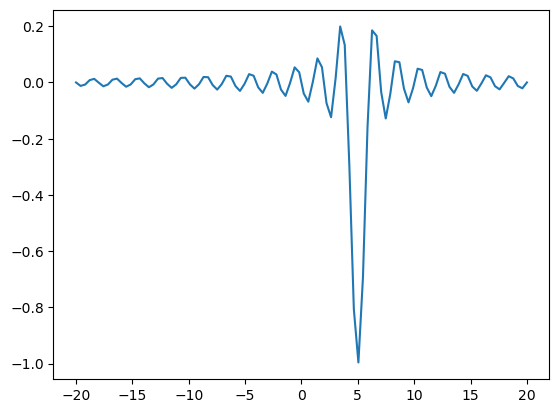

In [29]:
%matplotlib inline
def f(x, offset):
    return -np.sinc(x-offset)

x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5));

In [30]:
# note how additional function arguments are passed in
sol = opt.minimize_scalar(f, args=(5,)) # offset = 5
sol

     fun: -0.049029624014074166
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 10
 success: True
       x: -1.4843871263953001

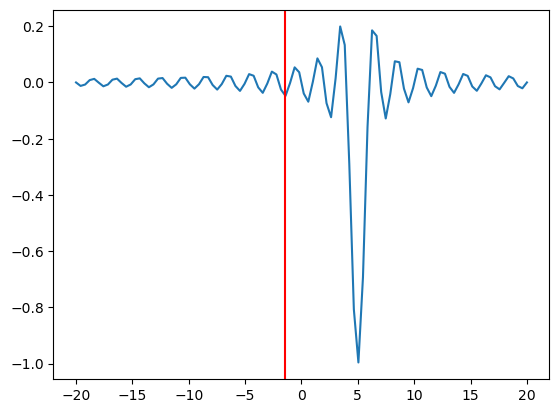

In [31]:
plt.plot(x, f(x, 5))
plt.axvline(sol.x,color='r')

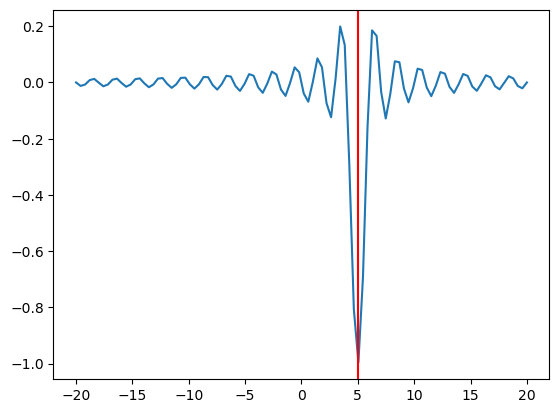

In [32]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
sols = [opt.minimize_scalar(f, args=(5,),
                            bracket=(l, u)) for (l, u) in zip(lower, upper)]

idx = np.argmin([sol.fun for sol in sols])
sol = sols[idx]

plt.plot(x, f(x, 5))
plt.axvline(sol.x,color='r');

This is an example of stochastic optimization where we have built our own "stochastic" component.

# Solving Optimization Problems

Optimization is more art than science. You have to choose both the correct problem to solve, the correct optimizer, the correct starting point, and the correct bounds. You should think of optimization as a tool to **help** you get to the solution, not as something that produces the "answer" to your problem. Never just believe the solution an optimizer (of any kind) produces -- test the solution. And before you use any optimizer, it is a good idea to test it on a problem where you know the solution (maybe an analytical solution).

**If** you can plot your problem, you should. Your eye probably provides the best approximate solution for low dimensional problems. Even using contour plots can help.

Standard diagnostic tools for optimization:
* Eye-squared -- look at the plotted solution against the objective
* Run the optimization several times to see if it produces consistent results
* Change the starting values several times to see if it produces consistent results
* Analyze a log of intermediate results per iteration -- does it converge in a way that makes sense?
* Look at the covariance matrix, the Jacobian, and the Hessian (whichever makes sense in the context of the problem) -- what is the condition number? Can you trust its stability?







<p>&nbsp;</p>


# References: 
S. Boyd and L. Vandenberghe (2004), Convex Optimization, Cambridge University Press.
